<a href="https://colab.research.google.com/github/luotom/requests/blob/master/captcha_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


In [0]:
!cat /proc/meminfo

In [0]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
import string

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
characters = string.digits + string.ascii_uppercase
print(characters)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5, 1.0, 'E91J')

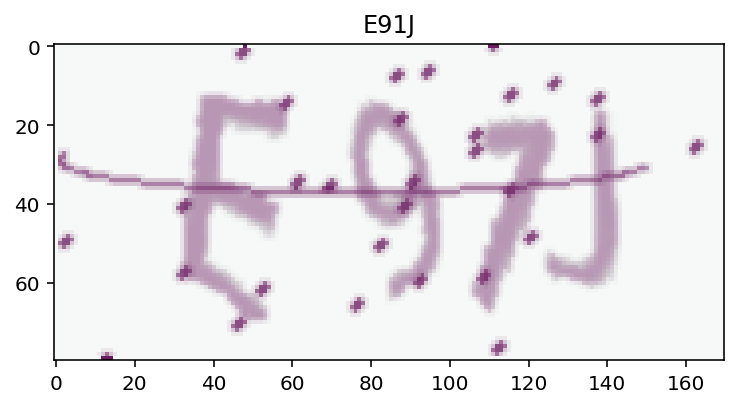

In [0]:
width, height, n_len, n_class = 170, 80, 4, len(characters)
generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

Text(0.5, 1.0, 'M8hD')

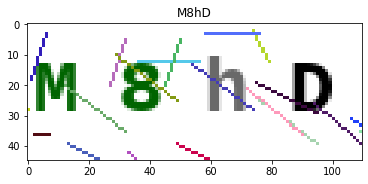

In [2]:
#/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
import random
import string
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


class Captcha:
    # 生成几位数的验证码
    number = 4
    # 验证码图片的高度和宽度
    size = (110, 45)
    # 验证码字体大小
    fontsize = 25
    # 加入干扰线条数
    line_number = 20

    # 构建一个验证码源文本
    SOURCE = list(string.ascii_letters)
    for index in range(0, 10):
        SOURCE.append(str(index))

    # 用来绘制干扰线
    @classmethod
    def __gene_line(cls, draw, width, height):
        x, y = random.randint(0, width), random.randint(0, height)
        begin = (x, y)
        end = (x+random.choice([18, 20, -5]), y+random.choice([10, -10, 15, 0]))
        draw.line([begin, end], fill=cls.__gene_random_color())

    # 用来绘制干扰点
    @classmethod
    def __gene_points(cls, draw, point_chance, width, height):
        chance = min(100, max(0, int(point_chance)))
        for w in range(width):
            for h in range(height):
                tmp = random.randint(0, 100)
                if tmp > 100 - chance:
                    draw.point((w, h), fill=cls.__gene_random_color())

    # 生成随机的颜色
    @classmethod
    def __choose_random_color(cls):
        colors = [(220, 20, 60), (0, 0, 255), (0, 100, 0), (255, 255, 0), (0, 0, 0), (105, 105, 105)]
        return random.choice(colors)

    # 生成随机的颜色
    @classmethod
    def __gene_random_color(cls, start=0, end=255):
        random.seed()
        return random.randint(start, end), random.randint(start, end), random.randint(start, end)

    # 随机选择一个字体
    @classmethod
    def __gene_random_font(cls):
        return '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf'

    # 用来随机生成一个字符串
    @classmethod
    def gene_text(cls, number):
        # num是生成验证码的位数
        return ''.join(random.sample(cls.SOURCE, number))

    # 生成验证码
    @classmethod
    def gene_graph_captcha(cls):
        # 验证码图片的高和宽
        width, height = cls.size
        # 创建图片
        image = Image.new('RGBA', (width, height), (255, 255, 255))
        # 验证码的字体
        font = ImageFont.truetype(cls.__gene_random_font(), cls.fontsize)
        # 创建画笔
        draw = ImageDraw.Draw(image)
        # 生成字符串
        text = cls.gene_text(cls.number)
        # 获取字体尺寸
        font_width, font_height = font.getsize(text)
        # 填充字符串
        x_pos, y_pos = 2, 8
        for t in text:
            draw.text((x_pos, y_pos), t, font=font, fill=cls.__choose_random_color())
            x_pos += 28
        # 绘制干扰线
        for x in range(0, cls.line_number):
            cls.__gene_line(draw, width, height)
        # 绘制噪点
        # cls.__gene_points(draw, 10, width, height)
        # image.save('images/gen2.png')
        return text, image


# title, img = Captcha.gene_graph_captcha()
# plt.imshow(img)
# plt.title(title)

In [0]:
from tensorflow.keras.utils import Sequence
import numpy as np

class CaptchaSequence(Sequence):
    def __init__(self, batch_size, steps, classes=62, n_len=4, width=110, height=45):
        self.batch_size = batch_size
        self.steps = steps
        self.classes = classes
        self.n_len = n_len
        self.width = width
        self.height = height
    
    def __len__(self):
        return self.steps
    
    def __getitem__(self, id):
        x = np.zeros((self.batch_size, self.height, self.width, 4), dtype=np.float32)
        y = [np.zeros((self.batch_size, self.classes), dtype=np.uint8) for i in range(self.n_len)]
        for i in range(self.batch_size):
            captcha = Captcha()
            text, img = captcha.gene_graph_captcha()
            x[i] = np.array(img) / 255
            for j, character in enumerate(text):
                y[j][i:] = 0
                y[j][i, captcha.SOURCE.index(character)] = 1
        return x, y

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Text(0.5, 1.0, 'kzNW')

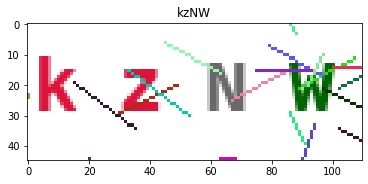

In [20]:
def decode(y):
    characters = list(string.ascii_letters)
    for index in range(0, 10):
        characters.append(str(index))
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[k] for k in y])

data = CaptchaSequence(batch_size=1, steps=1)
x, y = data[0]
plt.imshow(x[0])
plt.title(decode(y))

In [0]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

In [0]:

input_tensor = Input((45, 110, 4))
x = input_tensor
for i, n_cnn in enumerate([2, 2, 2, 2, 2]):
    for j in range(n_cnn):
        x = Conv2D(32*2**min(i, 3), kernel_size=3, padding='same', kernel_initializer='he_uniform')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = [Dense(62, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
model = Model(inputs=input_tensor, outputs=x)


In [26]:
!grep 'physical id' /proc/cpuinfo | sort -u

physical id	: 0


In [29]:
!grep 'core id' /proc/cpuinfo | sort -u | wc -l

1


In [30]:
!grep 'processor' /proc/cpuinfo | sort -u | wc -l

2


In [36]:
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import *

train_data = CaptchaSequence(batch_size=128, steps=1000)
valid_data = CaptchaSequence(batch_size=128, steps=100)
callbacks = [EarlyStopping(patience=3), ModelCheckpoint('cnn_best.h5', save_best_only=True)]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-3, amsgrad=True), 
              metrics=['accuracy'])
model.fit_generator(train_data, epochs=100, validation_data=valid_data, workers=2, use_multiprocessing=True,
                    callbacks=callbacks)


Epoch 1/100
1000/1000 [==============================] - 244s 244ms/step - loss: 1.5909 - c1_loss: 0.3973 - c2_loss: 0.3758 - c3_loss: 0.3823 - c4_loss: 0.4355 - c1_acc: 0.9092 - c2_acc: 0.9141 - c3_acc: 0.9134 - c4_acc: 0.9000 - val_loss: 0.0132 - val_c1_loss: 0.0022 - val_c2_loss: 0.0023 - val_c3_loss: 0.0062 - val_c4_loss: 0.0025 - val_c1_acc: 1.0000 - val_c2_acc: 1.0000 - val_c3_acc: 0.9984 - val_c4_acc: 0.9998
Epoch 2/100
1000/1000 [==============================] - 233s 233ms/step - loss: 0.0054 - c1_loss: 0.0013 - c2_loss: 0.0012 - c3_loss: 0.0013 - c4_loss: 0.0017 - c1_acc: 0.9999 - c2_acc: 1.0000 - c3_acc: 0.9999 - c4_acc: 0.9998 - val_loss: 0.0081 - val_c1_loss: 0.0012 - val_c2_loss: 0.0026 - val_c3_loss: 0.0016 - val_c4_loss: 0.0027 - val_c1_acc: 1.0000 - val_c2_acc: 0.9995 - val_c3_acc: 1.0000 - val_c4_acc: 0.9999
Epoch 3/100
1000/1000 [==============================] - 234s 234ms/step - loss: 0.0029 - c1_loss: 5.6952e-04 - c2_loss: 7.3090e-04 - c3_loss: 8.6180e-04 - c4_los

In [31]:
!pwd

/content


In [0]:
model.load_weights('cnn_best.h5')

callbacks = [EarlyStopping(patience=3), ModelCheckpoint('cnn_best.h5', save_best_only=True)]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-4, amsgrad=True), 
              metrics=['accuracy'])
model.fit_generator(train_data, epochs=100, validation_data=valid_data, workers=2, use_multiprocessing=True,
                    callbacks=callbacks)


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
(1, 45, 110, 4)


(-0.5, 109.5, 44.5, -0.5)

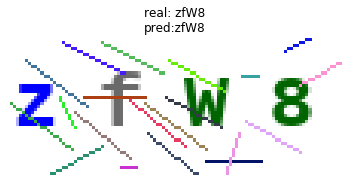

In [41]:
X, y = data[0]
y_pred = model.predict(X)
plt.title('real: %s\npred:%s'%(decode(y), decode(y_pred)))
plt.imshow(X[0], cmap='gray')
plt.axis('off')

(1, 45, 110, 4)
94Gv


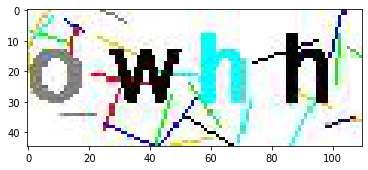

In [56]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

img_path = '2.png'

img = image.load_img(img_path).resize((110, 45)).convert('RGBA')
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)

print(decode(model.predict(x)))
